## So what is Churn ?

**Churn** is a measurement of the percentage of accounts that cancel or choose not to renew their subscriptions. A high churn rate can negatively impact Monthly Recurring Revenue (MRR) and can also indicate dissatisfaction with a product or service.

Churn is the measure of how many customers stop using a product. This can be measured based on actual usage or failure to renew (when the product is sold using a subscription model). Often evaluated for a specific period of time, there can be a monthly, quarterly, or annual churn rate.

When new customers begin buying and/or using a product, each new user contributes to a product’s growth rate. Inevitably some of those customers will eventually discontinue their usage or cancel their subscription; either because they switched to a competitor or alternative solution, no longer need to product’s functions, they’re unhappy with their user experience, or they can no longer afford or justify the cost. The customers that stop using/paying are the “churn” for a given period of time.

### What columns Do we have ?

**customerID**: Customer ID
<br>
**gender**: gender (female, male)
<br>
**SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
<br>
**PartnerWhether**: the customer has a partner or not (Yes, No)
<br>
**Dependents**: Whether the customer has dependents or not (Yes, No)
<br>
**tenure**: Number of months the customer has stayed with the company
<br>
**PhoneService**: Whether the customer has a phone service or not (Yes, No)
<br>
**MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
<br>
**InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
<br>
**OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
<br>
**OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
<br>
**DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
<br>
**TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
<br>
**StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
<br>
**StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
<br>
**Contract**: The contract term of the customer (Month-to-month, One year, Two year)
<br>
**PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
<br>
**PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
<br>
**MonthlyCharges**: The amount charged to the customer monthly
<br>
**TotalCharges**: The total amount charged to the customer
<br>
**Churn**: Whether the customer churned or not (Yes or No)

# Explatory Data Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [8]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
df.isnull().sum().sum()

0

Great no null values

Churn Percentages are
 No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


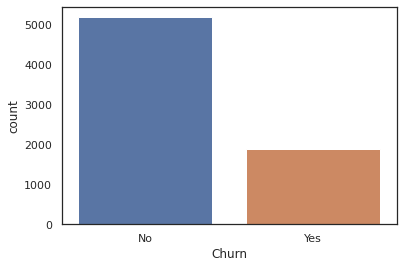

In [10]:
sns.countplot(df.Churn);
print ('Churn Percentages are\n',df.Churn.value_counts() / df.Churn.count())

The total percentage of chrun isn't much but we will explore it more 

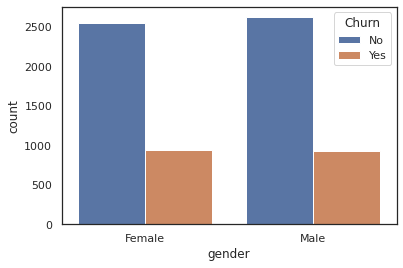

In [11]:
sns.countplot(x='gender', hue='Churn', data=df);

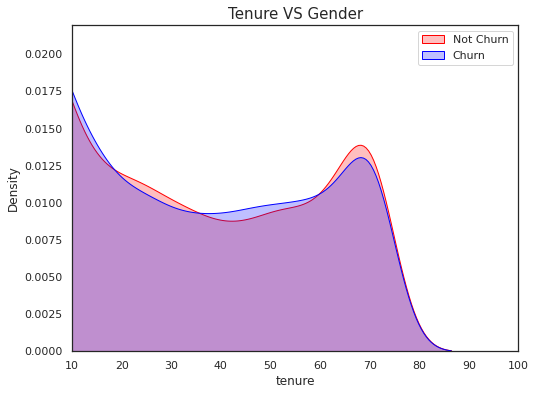

In [12]:
plt.figure(figsize=(8,6))

sns.kdeplot(df[df['gender'] == 'Male']["tenure"], color='red', shade=True)
sns.kdeplot(df[df['gender'] == 'Female']["tenure"], color='blue', shade=True) 

plt.title('Tenure VS Gender', fontsize=15)
plt.legend(["Not Churn","Churn"],loc='upper right');
plt.xlim([10,100])
plt.show()

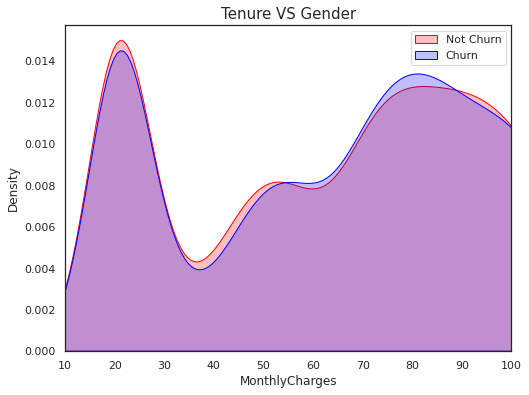

In [13]:
plt.figure(figsize=(8,6))

sns.kdeplot(df[df['gender'] == 'Male']["MonthlyCharges"], color='red', shade=True)
sns.kdeplot(df[df['gender'] == 'Female']["MonthlyCharges"], color='blue', shade=True) 

plt.title('Tenure VS Gender', fontsize=15)
plt.legend(["Not Churn","Churn"],loc='upper right');
plt.xlim([10,100])
plt.show()

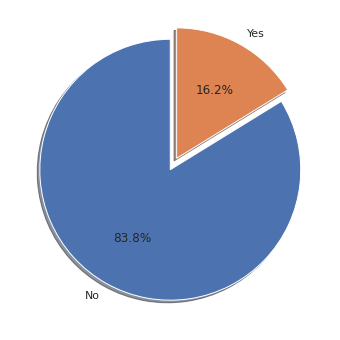

In [14]:
plt.figure(figsize=(8,6))
sizes = df.SeniorCitizen.value_counts()
labels = ["No", "Yes"]
explode = (0, 0.1,)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show() 

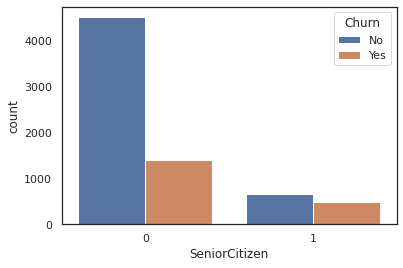

In [15]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df);

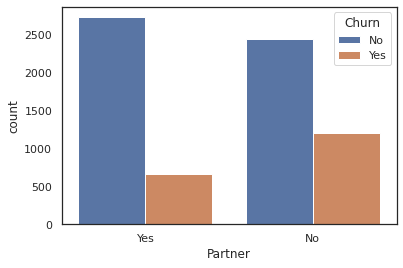

In [16]:
sns.countplot(x='Partner', hue='Churn', data=df);

<AxesSubplot:xlabel='tenure', ylabel='Count'>

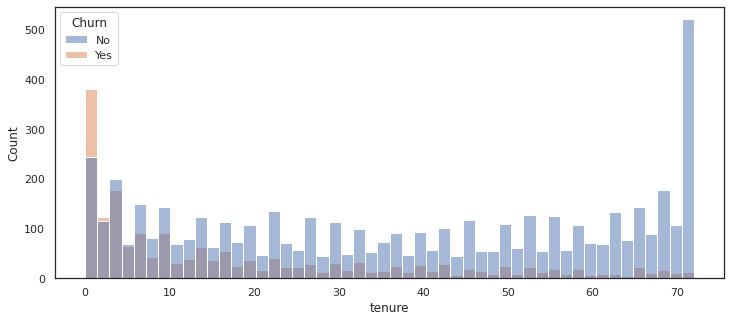

In [17]:
plt.figure(figsize=(12,5))
sns.histplot(x='tenure', hue='Churn', data=df, bins=50)

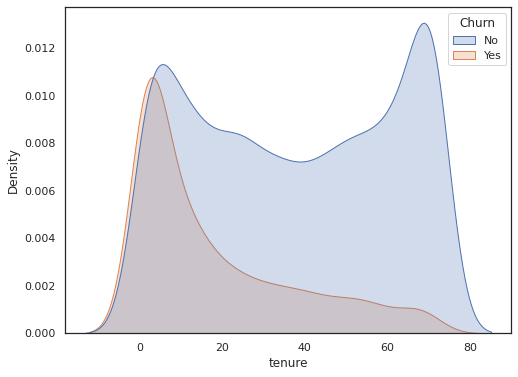

In [18]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='tenure', hue='Churn', data=df, shade=True);

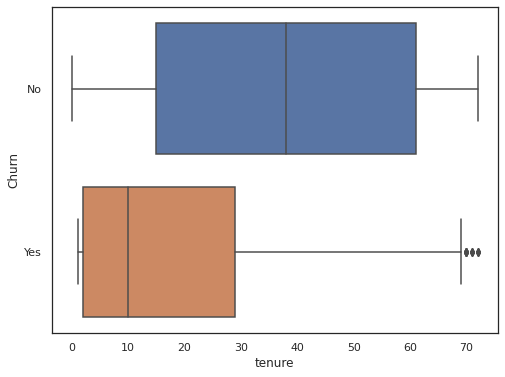

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='tenure', y='Churn',data=df);

We can tell that customers with higher tenure are less in Churn

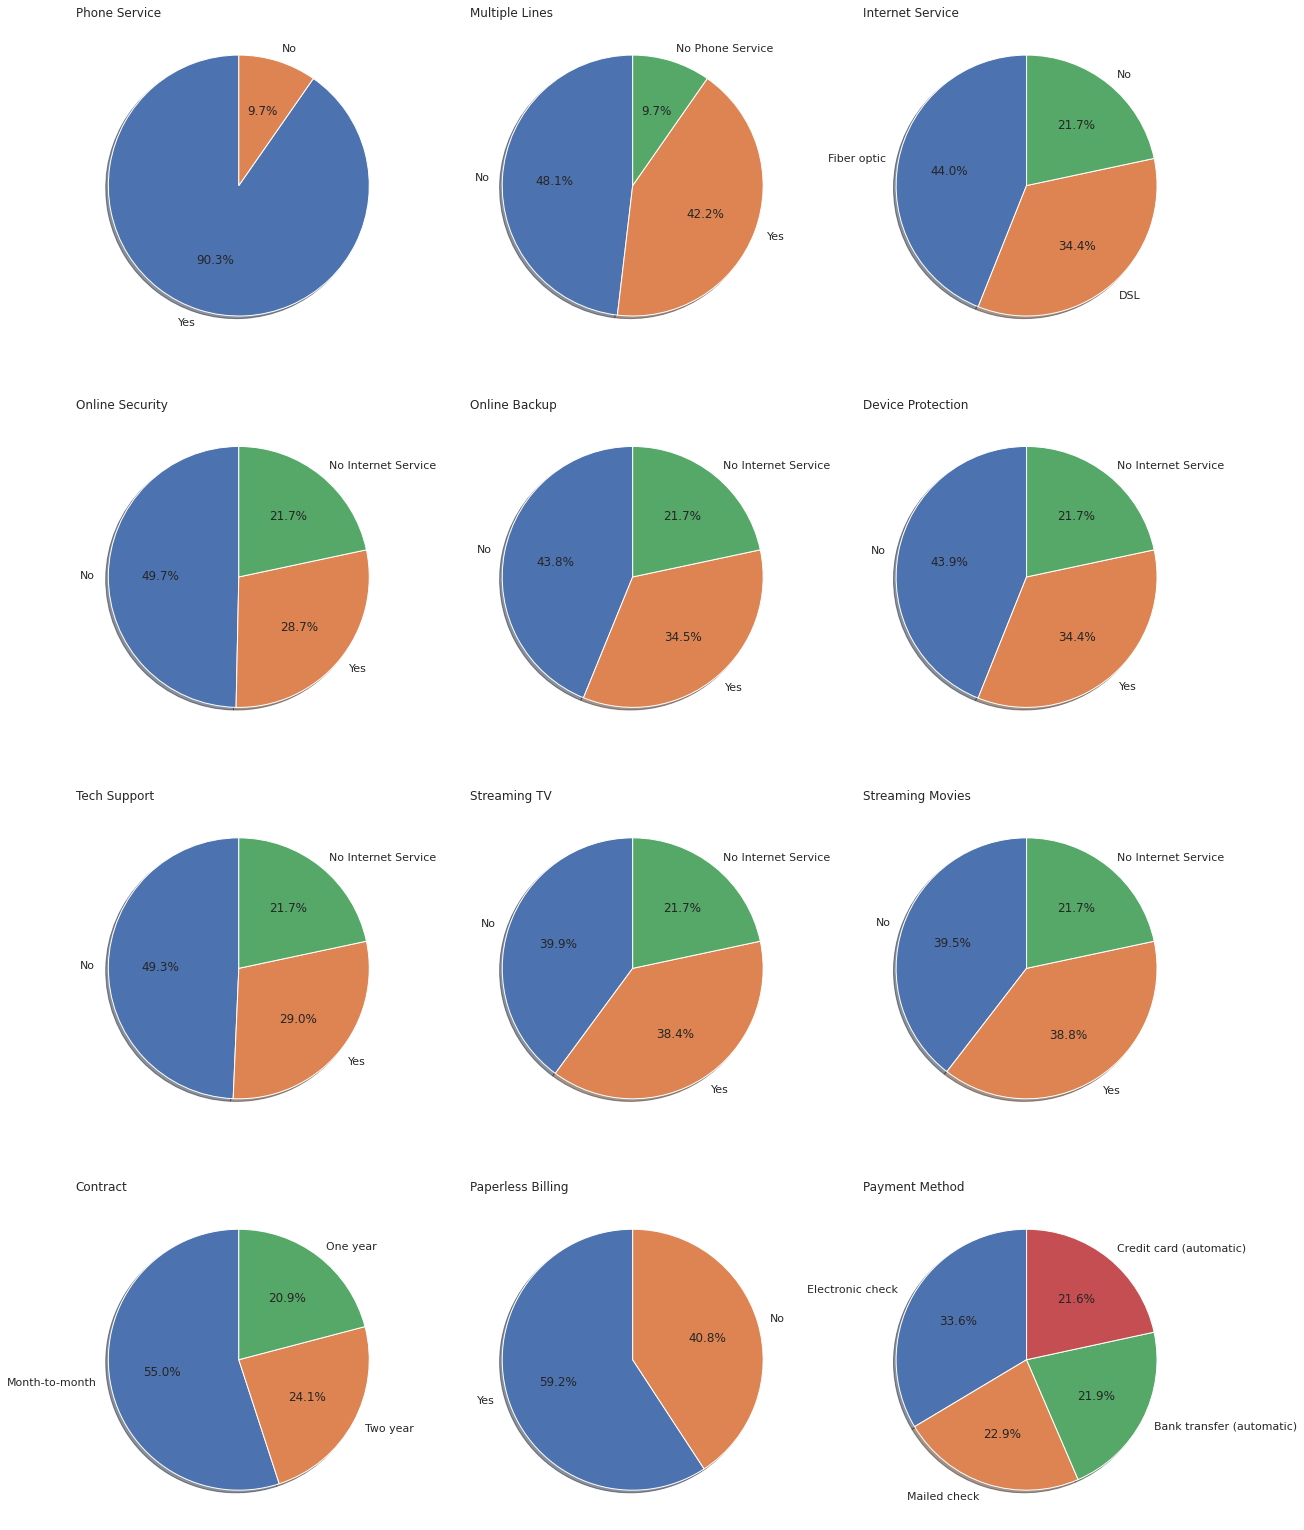

In [20]:
plt.figure(figsize=(20,42))

plt.subplot(6, 3, 1)
sizes = df.PhoneService.value_counts()
labels = ["Yes", "No"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Phone Service', loc='left')

plt.subplot(6, 3, 2)
sizes = df.MultipleLines.value_counts()
labels = ["No", "Yes", 'No Phone Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Multiple Lines', loc='left')

plt.subplot(6, 3, 3)
sizes = df.InternetService.value_counts()
labels = ["Fiber optic", "DSL", 'No']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Internet Service', loc='left')

plt.subplot(6, 3, 4)
sizes = df.OnlineSecurity.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Online Security', loc='left')

plt.subplot(6, 3, 5)
sizes = df.OnlineBackup.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Online Backup', loc='left')

plt.subplot(6, 3, 6)
sizes = df.DeviceProtection.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Device Protection', loc='left')

plt.subplot(6, 3, 7)
sizes = df.TechSupport.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Tech Support', loc='left')

plt.subplot(6, 3, 8)
sizes = df.StreamingTV.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Streaming TV', loc='left')

plt.subplot(6, 3, 9)
sizes = df.StreamingMovies.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Streaming Movies', loc='left')

plt.subplot(6, 3, 10)
sizes = df.Contract.value_counts()
labels = ["Month-to-month", "Two year", 'One year']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Contract', loc='left')

plt.subplot(6, 3, 11)
sizes = df.PaperlessBilling.value_counts()
labels = ["Yes", "No"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Paperless Billing', loc='left')

plt.subplot(6, 3, 12)
sizes = df.PaymentMethod.value_counts()
labels = ["Electronic check ", "Mailed check ", 'Bank transfer (automatic)', 'Credit card (automatic)']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Payment Method', loc='left');

In [21]:
columns = {'PhoneService':1, 'MultipleLines':2, 'InternetService':3, 'OnlineSecurity':4, 'OnlineBackup':5, 'DeviceProtection':6,
          'TechSupport':7, 'StreamingTV':8, 'StreamingMovies':9, 'Contract':10, 'PaperlessBilling':11, 'PaymentMethod':12}

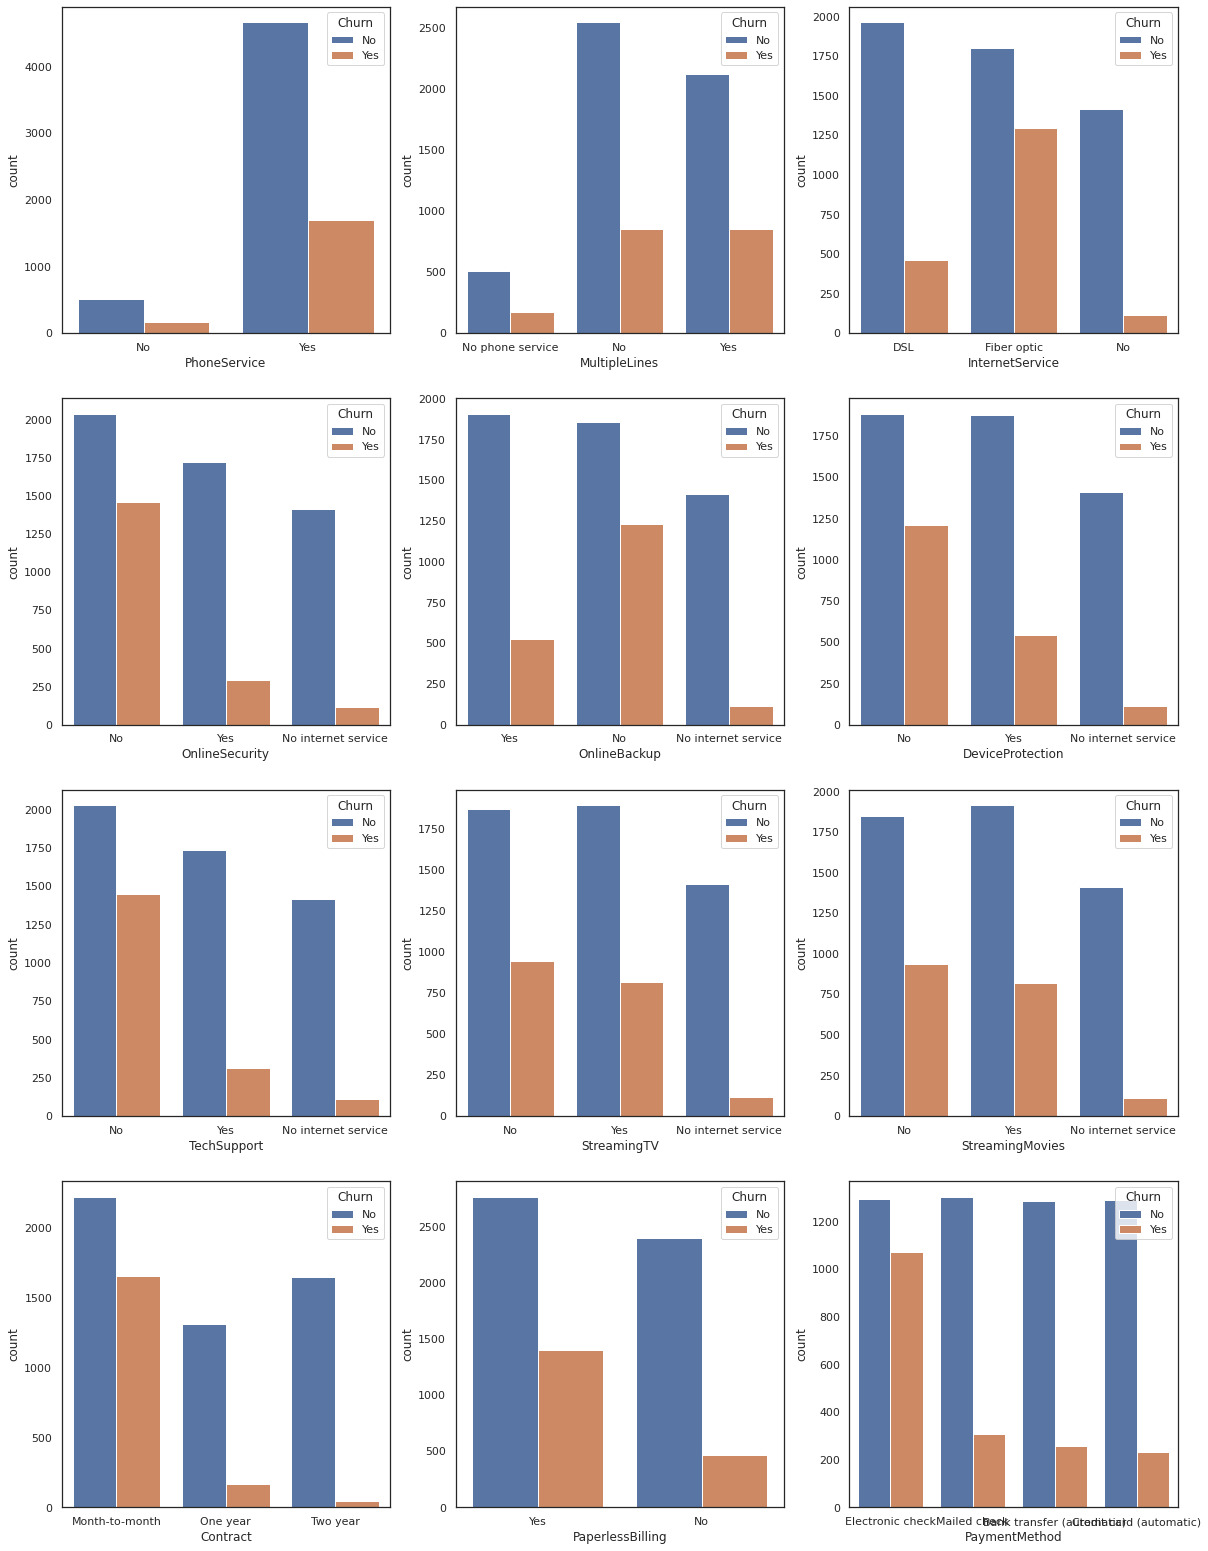

In [22]:
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x=key, hue='Churn', data=df)

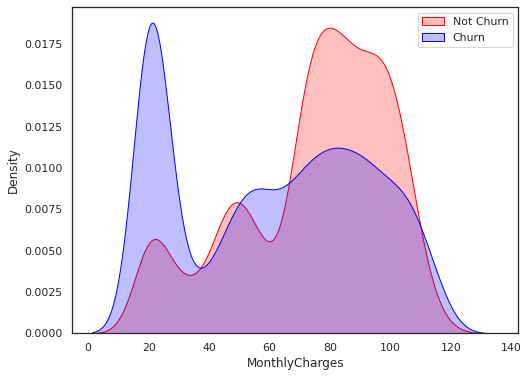

In [23]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']["MonthlyCharges"], color='red', shade=True)
sns.kdeplot(df[df['Churn'] == 'No']["MonthlyCharges"], color='blue', shade=True)
plt.legend(["Not Churn","Churn"],loc='upper right');

In [24]:
df.TotalCharges.dtype

dtype('O')

It seems that total charges is an abject type, We need to change it to mueric before we plot it 

In [25]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

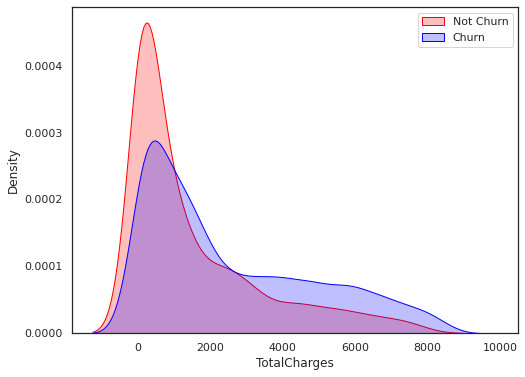

In [26]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']["TotalCharges"], color='red', shade=True)
sns.kdeplot(df[df['Churn'] == 'No']["TotalCharges"], color='blue', shade=True)
plt.legend(["Not Churn","Churn"],loc='upper right');

We can confirm that higher charges leads to churn

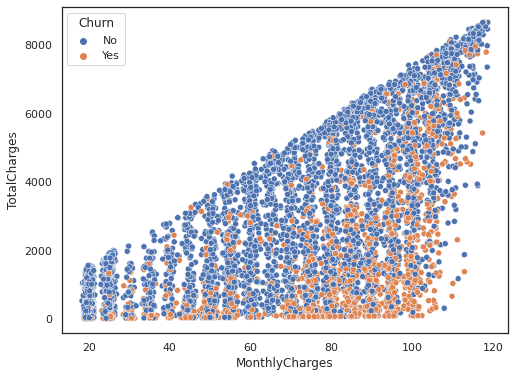

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',hue='Churn', data=df);

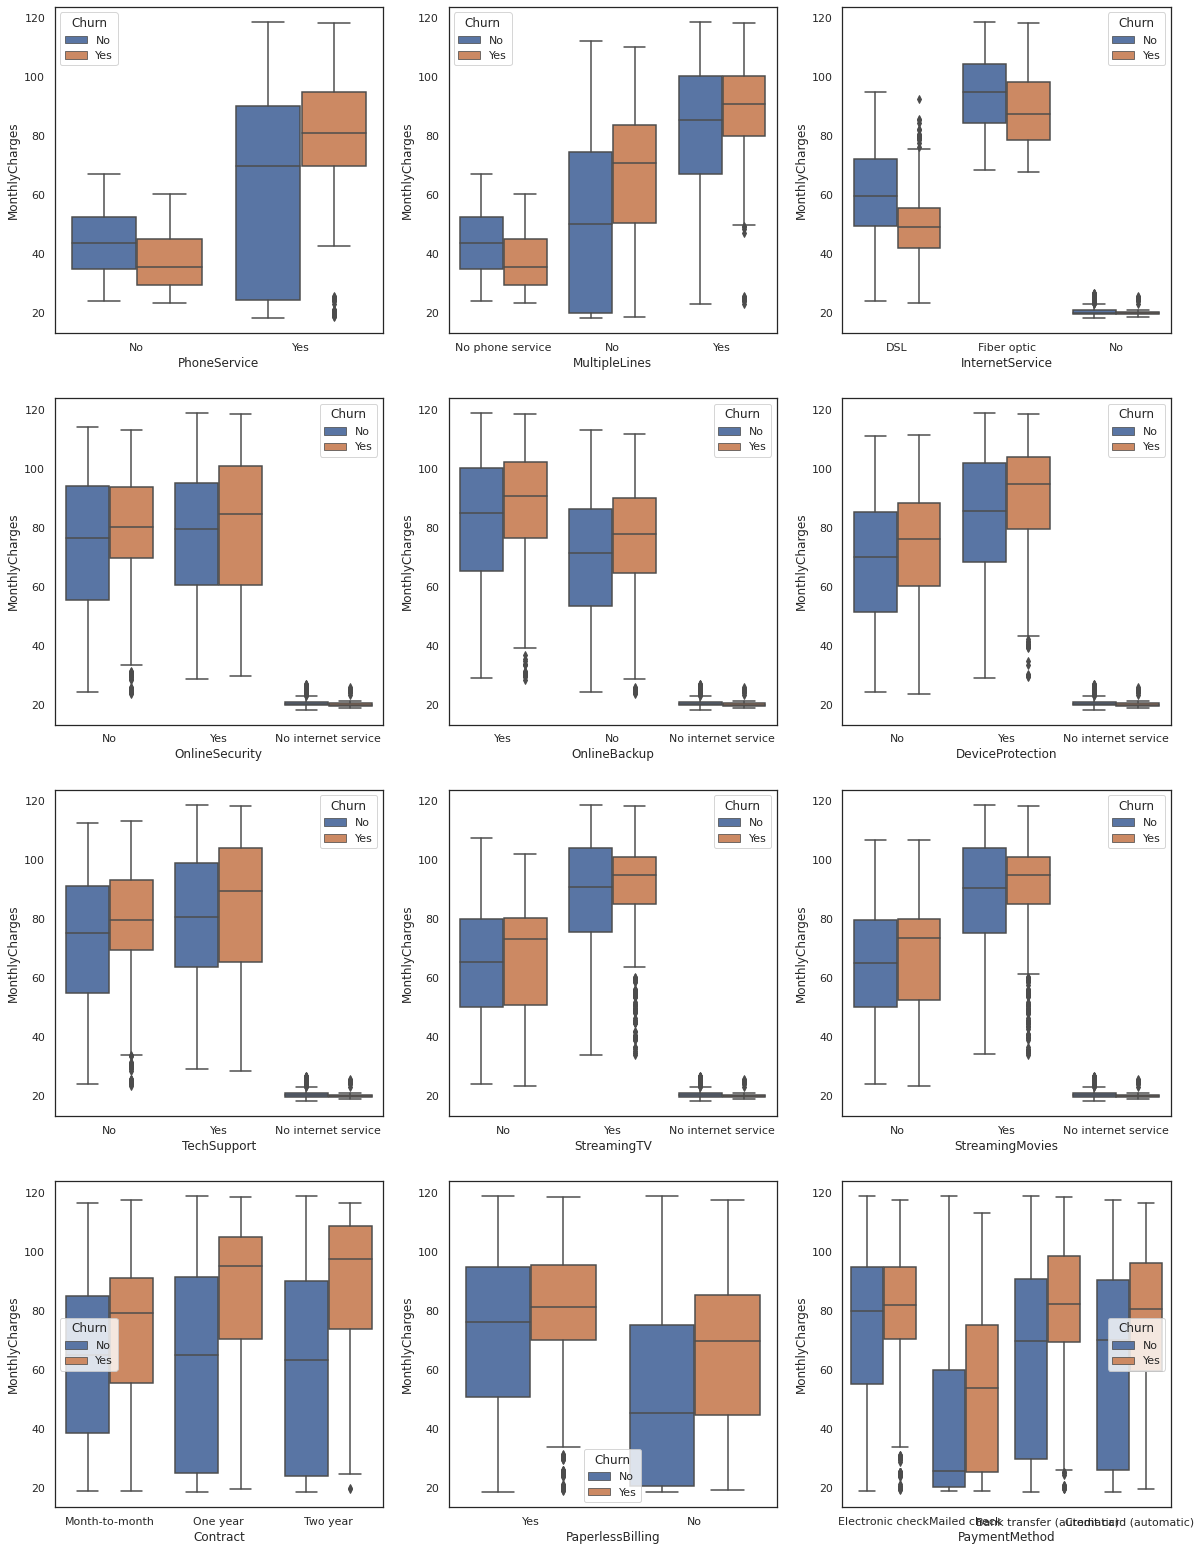

In [28]:
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.boxplot(x=key, y='MonthlyCharges',hue='Churn', data=df);

### Correlation between features

In [29]:
df.drop('customerID', axis=1, inplace=True)
df['Churn'].replace(to_replace ='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace = 'No', value=0, inplace=True)
df = pd.get_dummies(df)

I changed the values of Chrun values of churn manually so We can plot the coreelation plot as if we let it with dummies we will have 2 columns of churn

In [30]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [31]:
df.shape

(7043, 46)

In [32]:
df.isnull().sum().sum()

11

In [33]:
df = df.dropna()

In [34]:
df.isnull().sum().sum()

0

<AxesSubplot:>

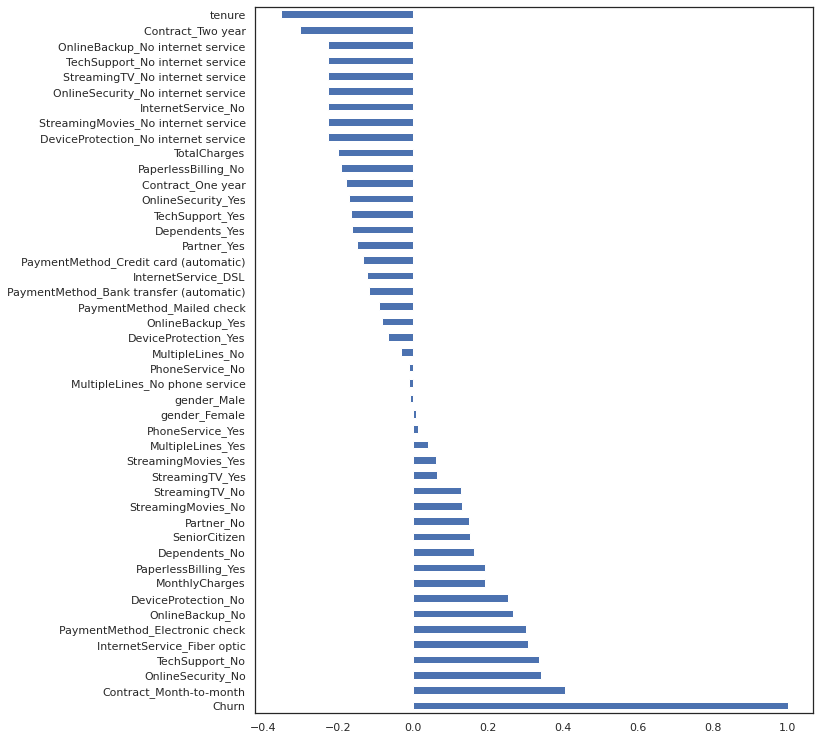

In [35]:
plt.figure(figsize=(10,13))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='barh')

**Please Consider Upvoting if you find this kernal useful**

# Mahine Learning Models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [37]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [38]:
y

array([0, 0, 1, ..., 0, 1, 0])

### Scaling The Data


Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information, the output will range from 0 to 1

In [39]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [40]:
X

array([[-0.44032709, -1.28024804, -1.16169394, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.44032709,  0.06430269, -0.26087792, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709, -1.23950408, -0.36392329, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-0.44032709, -0.87280842, -1.17000405, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 2.27103902, -1.15801615,  0.31916782, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709,  1.36810945,  1.35793167, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 45), (1407, 45), (5625,), (1407,))

In [43]:
def apply_model(model1):
    model = model1
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, cv = 6)
    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print ('Train score of '+str(model1)[:-2]+' is', score.mean(),'%')
    print ('--')
    print ('Precision score is ', precision)
    print ('--')
    print ('ROC Score is', roc)
    print ('--')
    print ('Recall Score is ', recall)
    print ('--')
    print ('Confusion Matrix\n\n', cm)

### 1- Logistic Regression

In [44]:
apply_model(LogisticRegression())

Train score of LogisticRegression is 0.8056915832485688 %
--
Precision score is  0.6185897435897436
--
ROC Score is 0.7004221648177004
--
Recall Score is  0.516042780748663
--
Confusion Matrix

 [[914 119]
 [181 193]]


### 2- Support Vector Machine

In [45]:
apply_model(SVC())

Train score of SVC is 0.7987566360907765 %
--
Precision score is  0.6236559139784946
--
ROC Score is 0.6817974747762346
--
Recall Score is  0.46524064171123
--
Confusion Matrix

 [[928 105]
 [200 174]]


### 3- KNeighbors

In [46]:
apply_model(KNeighborsClassifier())

Train score of KNeighborsClassifier is 0.7658680222913485 %
--
Precision score is  0.5241935483870968
--
ROC Score is 0.6750223894891055
--
Recall Score is  0.5213903743315508
--
Confusion Matrix

 [[856 177]
 [179 195]]


### 4- Random Forest

In [47]:
apply_model(RandomForestClassifier())

Train score of RandomForestClassifier is 0.7900471343541478 %
--
Precision score is  0.6118881118881119
--
ROC Score is 0.6802302105388489
--
Recall Score is  0.4679144385026738
--
Confusion Matrix

 [[922 111]
 [199 175]]


### 5- Ada Boost 

In [48]:
apply_model(AdaBoostClassifier())

Train score of AdaBoostClassifier is 0.8048008926248466 %
--
Precision score is  0.6292517006802721
--
ROC Score is 0.6945672487071042
--
Recall Score is  0.4946524064171123
--
Confusion Matrix

 [[924 109]
 [189 185]]


ok Logistic Regression gave me the highest accuracy, let's tune it with hyper-paramters and see if we will get higher accuracy

## Hyperparameters Tuning

I will use **GridSearchCV** to find the best hyperparameters
<br>
So what is it ?
<br>
cv: number of cross-validation you have to try for each selected set of hyperparameters. verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
in the end, you can select the best parameters from the listed hyperparameters

In [49]:
from sklearn.model_selection import GridSearchCV

In [52]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.025,0.05, 0.055, 0.07, 0.08],
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, scoring = 'accuracy',cv = 6)
grid_log_reg.fit(X_train, y_train)
y_pred = grid_log_reg.predict(X_test)
best_score = grid_log_reg.best_score_
best_params = grid_log_reg.best_params_
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('Best Score is',best_score * 100)
print ('--')
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

Best Score is 80.46260540565963
--
Best Parameters is {'C': 0.05, 'penalty': 'l2', 'solver': 'newton-cg'}
--
ROC Score is 0.7015054019495679
--
Recall Score is  0.5133689839572193
--
Confusion Matrix

 [[919 114]
 [182 192]]


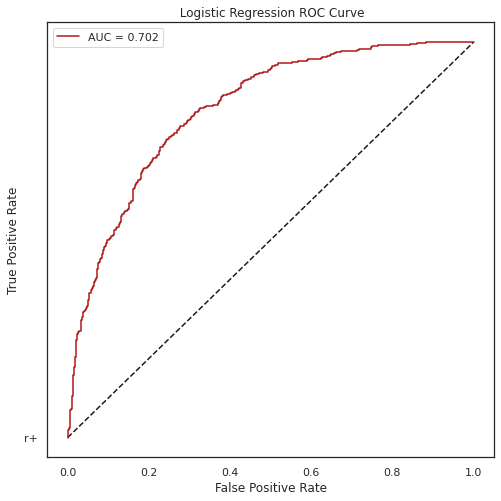

In [54]:
y_pred_prob = grid_log_reg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'AUC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" Logistic Regression ROC Curve")
plt.legend()
plt.show()

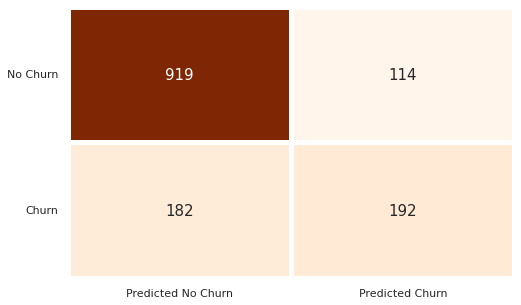

In [55]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Oranges', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Churn', 'Churn'], xticklabels = ['Predicted No Churn', 'Predicted Churn'])
plt.yticks(rotation = 0)
plt.show()

**Please Consider Upvoting if you find this kernal useful**